In [1]:
%cd ..
import numpy as np
import pandas as pd

/home/cole/Documents/BDS/bds-final-project


In [2]:
from src.merge import closure_data

df = closure_data()

In [5]:
drop_list = ['inspection_year', 'inspection_month', 'zip']

In [22]:
from sklearn.decomposition import PCA

p = PCA(n_components=2)

dfp = p.fit_transform(df.drop(drop_list, 1))

In [18]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=3)

clusters = k.fit_predict(df.drop(drop_list, 1))

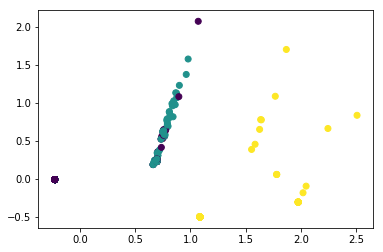

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(dfp[:,0], dfp[:,1], c=clusters)

In [20]:
df['cluster'] = clusters

In [23]:
df['cluster'].value_counts()

1    661
0    513
2    126
Name: cluster, dtype: int64

In [25]:
df.corr()['cluster']

inspection_year                                                      -0.002024
inspection_month                                                     -0.040662
zip                                                                   0.597249
violation_04m                                                        -0.001304
violation_04a                                                         0.049928
violation_05d                                                         0.069897
violation_08c                                                         0.045268
violation_05f                                                         0.069952
cuisine_american                                                      0.072415
cuisine_asian                                                         0.013012
cuisine_bakery                                                       -0.002091
cuisine_bangladeshi                                                   0.013012
cuisine_bottled_beverages_including_water_sodas_juic

In [27]:
df = df.drop('cluster', 1)

In [28]:
df = df.drop(drop_list, 1)

In [47]:
from sklearn.model_selection import train_test_split

dc = ['total_closures'] + [c for c in df.columns if "reason" in c]

y = df['total_closures']
x = df.drop(dc, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
x

,violation_04m,violation_04a,violation_05d,violation_08c,violation_05f,cuisine_american,cuisine_asian,cuisine_bakery,cuisine_bangladeshi,cuisine_bottled_beverages_including_water_sodas_juices_etc,...,cuisine_pizzaitalian,cuisine_salads,cuisine_sandwiches,cuisine_seafood,cuisine_soul_food,cuisine_spanish,cuisine_thai,cuisine_turkish,cuisine_vegetarian,cuisine_vietnamesecambodianmalaysia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)

gbm.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
from sklearn.metrics import r2_score

r2_score(y_test, gbm.predict(x_test).round())

0.12334477685139766

In [51]:
b1 = np.where(y_test >= 1.0, 1, 0)
b2 = np.where(gbm.predict(x_test).round() >= 1.0, 1 ,0)

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(b1, b2)

0.3858827203872882

In [54]:
sorted(list(zip(gbm.feature_importances_, x.columns)), reverse=True)[:15]

[(0.30552520338471123, 'violation_04a'),
 (0.1813219605774689, 'violation_05d'),
 (0.10799964316155948, 'violation_05f'),
 (0.10595164976509333, 'violation_04m'),
 (0.05164502181830539, 'cuisine_american'),
 (0.04397462649788964, 'cuisine_caribbean'),
 (0.031854298820050295, 'cuisine_cafãcoffeetea'),
 (0.02842202543599206, 'cuisine_indian'),
 (0.023586911485183836, 'cuisine_chinese'),
 (0.021245189423181692, 'cuisine_seafood'),
 (0.017831012515371173, 'violation_08c'),
 (0.01063211343216678, 'cuisine_chicken'),
 (0.01062128135666089, 'cuisine_french'),
 (0.01061993286278257, 'cuisine_delicatessen'),
 (0.01058140349533205, 'cuisine_donuts')]